In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu/) with your answers on or before **10:00am on Friday April 22nd**.


---
# Homework 5: Applications of Linear Algebra to Data Science

In [1]:
# Some python packages you may need in this homework.
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)
from sklearn import datasets
import pandas as pd

In [2]:
import os.path
from urllib.request import urlretrieve
if not os.path.isfile("answercheck.py"):
    urlretrieve('https://raw.githubusercontent.com/colbrydi/jupytercheck/master/answercheck.py', 'answercheck.py');

In [3]:
# Import for checking answers
from answercheck import checkanswer
# This turns off detailed warnings
checkanswer.detailedwarnings = False

---
# Outline

1. [Principal Component Analysis](#pca_image_segmentation) (40 pts)
1. [Linear Dynamical Systems](#lds_ode) (35 pts)
1. [Least Squares Fitting with Real Data](#lsf_real_data) (25 pts)

---
<a name="pca_image_segmentation"></a>
# 1. Principal Component Analysis: color based image segmentation (40 pts)

Image segmentation is the process of separating the stuff you are interested in (foreground) with stuff you are not 
interested in (background).  Color is often used as an easy way to segment images.  Thresholds are selected for pixels in a range of color and defined as either foreground or background.

Faces come in a diverse range of colors making them difficult to segment using traditional **<font color="red">Red</font>**, **<font color="green">Green</font>** and **<font color="blue">Blue</font>** values.  

<img src="https://i.pinimg.com/236x/b6/dc/3f/b6dc3fb5f55696cb85bc1b849a24a36d--american-indians-children-books.jpg">

In this question we are going to use eigenvectors and Principal Component Analysis (PCA) to learn a new "skin tone colorspace" designed to make it much easier to segment faces (skin colors) from the background. 

To start we are going to download a bunch of color values from the following website.  

> https://archive.ics.uci.edu/ml/datasets/skin+segmentation#

The file we are interested in is linked below:

> https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

The file contains thousands of colors selected from a diverse population of face images.  Note these colors are in the order BGR or **<font color="blue">Blue</font>**, **<font color="green">Green</font>** and **<font color="red">Red</font>**.  The file also contains hundreds of BGR colors selected from non-faces (these non-face colors are used in machine learning but are discarded for this homework). The fourth number in each row is a label where the number one (1) indicates the row is a skin color and two (2) indicates a non-skin color. 

The following cells downloads the file, removes all of the non-skin values, reorders the points to RGB and plots the skin points as a scatter plot in traditional **<font color="red">R</font>** **<font color="green">G</font>** **<font color="blue">B</font>** space. 

In [4]:
# Get the data file from the internet:
from urllib.request import urlopen, urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
file = "Skin_NonSkin.txt"

response = urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') 
lines = text.split('\r\n')

data = []

# Read in file line by line
for line in lines:
    try:
        if line:
            data.append(list(map(int, line.split('\t'))))
    except:
        print('invalid line of data:',line)
response.close()

In [5]:
# Convert the file to a list of points
P = np.matrix(data)
P.shape

In [6]:
# Mask out only face values and keep just the RGBs
mask = np.array(P[:,3]==1)
mask = mask.flatten()
points = P[mask,:]

# Change order to Red, Green, Blue
points = points[:,(2,1,0)]

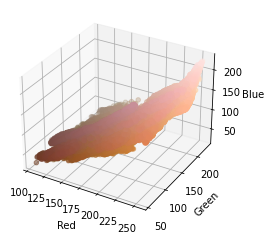

In [7]:
# Plot the points in 3D using their actual color values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], c=points/255)

ax.set_xlabel('Red');
ax.set_ylabel('Green');
ax.set_zlabel('Blue');

###### <mark>&#9989; **<font color=red>Question 1.1</font>**: (6 points) </mark> 
* <mark>First, compute the average (mean) R, G and B values in the ```points``` plotted in the above figure. Store the these values in a vector named ```mn```. </mark> 
* <mark>Then, center the ```points``` around the origin by subtracting the mean values ```mn``` from each of the ```points``` and store the mean centered data in a new matrix called ```A```.</mark>    

In [8]:
#####Start your code here #####
mn = np.mean(points,axis=0)
A = points - mn
#####End of your code here#####

In [9]:
checkanswer.vector(mn,"1fa50978a380472875752d3d083afa41");

Testing Answer
Answer seems to be correct



In [10]:
checkanswer.matrix(A, "968ac30b396e941c60b6fcfeade0335c");

Testing Answer
Answer seems to be correct



Plot the centered points $A$ and make sure they are approximately centered around the origin.

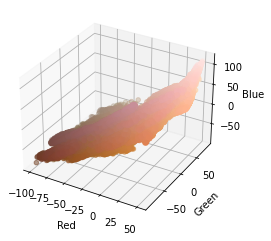

In [11]:
# Plot the points in 3D using their actual color values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A[:,0], A[:,1], A[:,2], c=points/255)

ax.set_xlabel('Red');
ax.set_ylabel('Green');
ax.set_zlabel('Blue');

<mark>&#9989; **<font color=red>Question 1.2</font>**: (10 points) </mark>
    
* <mark>Calculate the Gram matrix $C = A^T A$, store it in the variable $C$ and print its shape.</mark>

* <mark>Compute the eigenvalues ```vals``` and eigenvectors ```vecs``` of the Gram matrix $C$ and order the eigenvalues (and corresponding eigenvectors) in order of decreasing eigenvalues. </mark>

In [12]:
#####Start your code here #####
C = A.T * A
vals, vecs = np.linalg.eig(C)

#####End of your code here#####

In [13]:
checkanswer.matrix(C, "267893b255a1b2035403c91c74443a63");

Testing Answer
Answer seems to be correct



In [14]:
checkanswer.vector(vals, "b610cfc4a7d0a0d244b244af9f8607d9");

Testing Answer
Answer seems to be correct



In [15]:
checkanswer.matrix(vecs, "1ae3c284113d7aa8e560f8d829d35b0d");

Testing Answer
Answer seems to be correct



<mark>&#9989; **<font color=red>Question 1.3</font>**: (6 points) Verify if the $3 \times 3$ eigenvectors ```vecs``` is an orthogonal matrix. If not, orthonormalize ```vecs```. We will use ```vecs``` later as the color transformation matrix to transform points from RGB space into the new principal component's color space. </mark>

In [16]:
#####Start your code here #####
x = vecs.T * vecs
print(x)

#####End of your code here#####

[[ 1.00000000e+00 -4.99600361e-16  4.16333634e-16]
 [-4.99600361e-16  1.00000000e+00 -1.24900090e-15]
 [ 4.16333634e-16 -1.24900090e-15  1.00000000e+00]]


Now lets download and view an example image that has faces and see if we can segment out the faces using skin color.

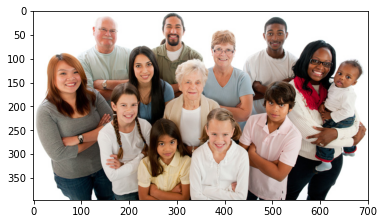

In [17]:
from imageio import imread

url = 'https://hecatedemeter.files.wordpress.com/2013/12/diverse-crowd.jpg'
file = 'Faces.jpg'

urlretrieve(url,file);

im = imread(file)
plt.imshow(im);

The following code "unwraps" this image and puts it into a new im_points matrix:

In [18]:
# Turn into into 3 x n vector
im_points = im.reshape((im.shape[0]*im.shape[1],3))
im_points.shape

<Mark>&#9989; **<font color=red>Question 1.4</font>**: (6 points) Now take the image points ```im_points``` and center them using the mean vector ```mn``` calculated above into a new matrix ```im_A```. Plot the centered ```im_A``` in the **<font color="red">R</font>** **<font color="green">G</font>** **<font color="blue">B</font>** space as above.</Mark>

In [19]:
#####Start your code here #####

im_A = im_points - mn
#####End of your code here#####

In [20]:
checkanswer.matrix(im_A, "0394347f996826c68245671d07e5bcf4");

Testing Answer
Answer seems to be correct



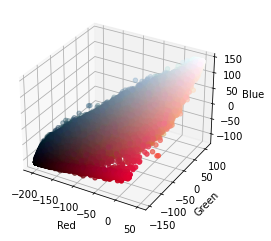

In [21]:
# Plot the points in 3D using their actual color values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(im_A[:,0], im_A[:,1], im_A[:,2], c=im_points/255)

ax.set_xlabel('Red');
ax.set_ylabel('Green');
ax.set_zlabel('Blue');

<Mark>&#9989; **<font color=red>Question 1.5</font>**: (6 points) </Mark>

* <Mark>Use the $3 \times 3$ color transformation matrix ```vecs``` calculated above to transform the ```im_A``` points into the new face PCA colorspace. Name the new points ```color_points```. </Mark>

* <Mark>Check if ```color_points``` has the same shape as ```im_points```.</Mark>

In [22]:
#####Start your code here #####
color_points = im_A * vecs
print(color_points.shape)
print(im_points.shape)
#####End of your code here#####

(277596, 3)
(277596, 3)


The next step transforms the ```color_points``` back into image matrices

In [23]:
# Turn each component back into a square image
principal_axis_1 = np.array(color_points[:,0].reshape(im[:,:,0].shape))
principal_axis_2 = np.array(color_points[:,1].reshape(im[:,:,0].shape))
principal_axis_3 = np.array(color_points[:,2].reshape(im[:,:,0].shape))

Because we are dealing with pictures, we should be able to visualize how each color point in the image falls on the eigvenvectors (aka principal components vectors).  The following code shows each principal axis as a grayscale image and the combined picture in a "skin tone" colorspace (where the first principal axis is mapped to Red, the second to Green and the third to Blue).  This last one doesn't really tell us that much but it is interesting

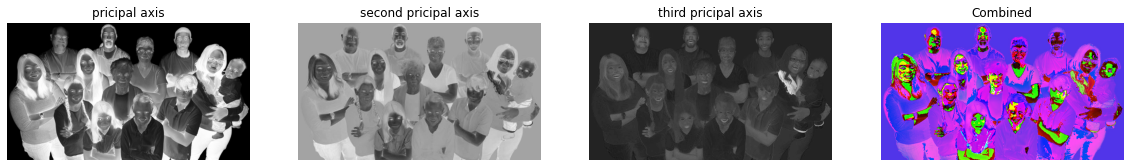

In [24]:
f, ax = plt.subplots(1,4, figsize=(20,10))

ax[0].imshow(principal_axis_1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('pricipal axis')
ax[1].imshow(principal_axis_2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('second pricipal axis')
ax[2].imshow(principal_axis_3, cmap='gray');
ax[2].axis('off')
ax[2].set_title('third pricipal axis');

combined = im.copy()
combined[:,:,0] = principal_axis_1
combined[:,:,1] = principal_axis_2
combined[:,:,2] = principal_axis_3

ax[3].imshow(combined);
ax[3].axis('off')
ax[3].set_title('Combined');

Now, if we assume we did everything right the first picture on the right should represent the values on the first principal axis.  The second and third image are orthogonal to the first. If we assume that most of the variance in the face colors are represented in this first image than we can model faces (skin) as the values close to this axis.  

Or, another way to look at is is the points closest to the first axis are more like skin colors and the points farther away from the first image is less like a skin.  Points farther away from the first axis will have large values in the second and third principal axes.  


<Mark>&#9989; **<font color=red>Question 1.6</font>**: (6 points) create a new matrix (same size as the image) with values equal to the euclidian distance of each of the PCA points to the first principal axis. In other words, write code to do the following where $p_2$ is the second principal axis and $p_3$ is the third: 
$$ distance = \sqrt{p_2^2 + p_3^2}$$ </Mark>

In [25]:
#####Start your code here #####
distance = np.sqrt(principal_axis_2**2 + principal_axis_3**2)

#####End of your code here#####

In [26]:
checkanswer.matrix(distance, "8e1e05f148bc760af2e4d43c3f816cdc");

Testing Answer
Answer seems to be correct



We can then display this distance using the following code:

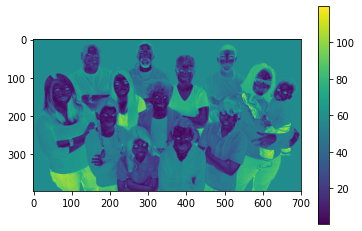

In [27]:
plt.imshow(distance, cmap='viridis')
plt.colorbar()

Low distances in the above distance matrix should represent colors close to "skin" and larger distances should represent colors farther away from skin. Use the following code to pick a threshold to try and best highlight the pixels in the image that represent skin.

Text(0.5, 1.0, 'Original Image')

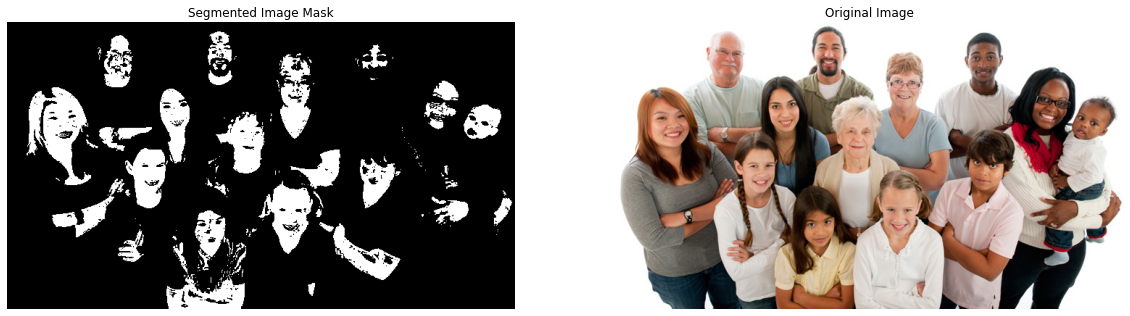

In [28]:
distance_threshold = 20

segment =  distance < distance_threshold

f, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].imshow(segment, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Segmented Image Mask')
ax[1].imshow(im)
ax[1].axis('off')
ax[1].set_title('Original Image')

If we did everything right the right-hand picture above should be a mask of all pixels in the left hand images that are skin tones.  Obviously this is not a perfect model.

---
<a name="lds_ode"></a>
# 2. Linear Dynamical Systems (35 pts)
<img alt="figure showing 2D arrows on a 2D plane representing the direction of change in the state of a dynamical system" src="https://lh6.googleusercontent.com/CyjBFJIOmdMmdVBVSSJp1vVhSK_yPA_g4Yg8FqBbDb7j3A85EjeQTsG_MYgLnP9C9Q1shrrjK4lO6wVi7ZfMyuU6jcdy7TuthfbekG1m6MQnE7IqyonYwUhddAxBjOIiXQ=w360"> 

Consider the dynamical system where

$$\dot x_1 = -6x_1 + 3x_2 + 4x_3$$
$$\dot x_2 = 2x_1 + 5x_2 - x_3$$
$$\dot x_3 = x_1 + 4x_2 - 3x_3$$

<Mark>&#9989; **<font color=red>Question 2.1: (5 points)</font>** Find the matrix A such that $\dot x= Ax$ for this system, where $x=\begin{bmatrix} x_1 \\ x_2 \\x_3 \end{bmatrix}$</Mark>

In [29]:
#####Start your code here #####
A = np.matrix([[-6,3,4],[2,5,-1],[1,4,-3]])

#####End of your code here#####

In [30]:
checkanswer.matrix(A,'f5221aa3bcf8195d9a36d0ba065271fd',decimal_accuracy=3)

Testing Answer
Answer seems to be correct



<Mark>&#9989; **<font color=red>Question 2.2: (6 points)</font>** Let $dt = 0.01$.  If the value $t=0$ is $x_0=\begin{bmatrix} 1 \\ 0 \\ -2 \end{bmatrix}$, find the value of $x$ when $t=1$.  (Call it x_1)</Mark>

In [31]:
#####Start your code here #####

x_0 = np.matrix([[1],[0],[-2]])
dt = 0.01
x = x_0
for i in range(100):
    x = x + dt * A @ x
x_1 = x
print(x_1)

#####End of your code here#####

[[19.49557264]
 [43.58396472]
 [23.01930769]]


In [32]:
checkanswer.vector(x_1,'55b0aae5f7b693c84ed1b61cb5cb5827',decimal_accuracy=3)

Testing Answer
Answer seems to be correct



<Mark>&#9989; **<font color=red>Question 2.3: (9 points)</font>** </Mark>
    
* <Mark>Find the eigenvectors ```vects``` and eigenvalues ```vals``` of A.  </Mark>

* <Mark>Then write $x_0$ in terms of the eigenvectors ```vects```; that is, find coefficients $c_1$, $c_2$, and $c_3$ such that $$x_0 = c_1 x_{e1} + c_2 x_{e2} + c_3 x_{e3},$$ where $x_{e1}$ is the eigenvector corresponding to the positive eigenvalue and $x_{e2}$ is the eigenvector corresponding to the most negative eigenvalue.</Mark>

In [33]:
#####Start your code here #####

vals, vects = np.linalg.eig(A)
B = np.linalg.solve(vects,x_0)

c1 = B.A1[0]
c2 = B.A1[1]
c3 = B.A1[2]
#####End of your code here#####

In [34]:
checkanswer.vector([c1, c2, c3],'af23fcfeca270e1a163cb26d69dfcb5b',decimal_accuracy=3)

Testing Answer
Answer seems to be correct



<Mark>&#9989; **<font color=red>Question 2.4: (5 points)</font>** Next examine a modified dynamical system $\dot x = Ax + b$, where $b = \begin{bmatrix} 1 \\ 3 \\ -2 \end{bmatrix}$.  Find the equilibrium point for this modified dynamical system (that is, where $\dot x = 0$).  Call if x_e.</Mark>

In [35]:
#####Start your code here #####
b = np.matrix([[1],[3],[-2]])
x = 0 - b
x_e = np.linalg.solve(A,x)
print(x_e)

#####End of your code here#####

[[-1.1827957 ]
 [-0.46236559]
 [-1.67741935]]


In [36]:
checkanswer.vector(x_e,'7578f4c08ea33b5b5618395b6f7626c1',decimal_accuracy=3)

Testing Answer
Answer seems to be correct



<Mark>&#9989; **<font color=red>Question 2.5: (10 points)</font>**  If the initial value of $x$ is $(1,0,-2)^T$ and $dt = 0.01$, find $x$ at $t = 1$ with this modified dynamical system.  Call it x_1n.</Mark>

In [37]:
#####Start your code here #####
x = np.matrix([[1],[0],[-2]])
dt = 0.01
for i in range(100):
    x = x + dt * (A @ x + b)
x_1n = x
print(x_1n)

#####End of your code here#####

[[ 66.58195234]
 [149.91727908]
 [ 78.2427764 ]]


In [38]:
checkanswer.vector(x_1n,'3e7acf34e19ba9210a5fb1aa325fa959',decimal_accuracy=3)

Testing Answer
Answer seems to be correct



---
<a name="lsf_real_data"></a>
# 4. Least Squares Fitting with Real Data (25 pts)

<img src="https://cdn.pixabay.com/photo/2020/03/19/04/36/covid19-4946260_1280.jpg" width="60%" alt="Picture of the COVID19 Virus, not really needed but provides motivation.">

Image from: [https://pixabay.com/](https://pixabay.com/illustrations/covid19-corona-virus-coronavirus-4946260/) 

In your pre-class and in-class work on different days you studied infectious disease models. In this question we are going to look at some real infectious disease data. Consider the following dataset from the [COVID-19 Dashboard by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19). The model in this question will be different from the models we studied in class because this real data contains only confirmed cases, confirmed deaths, and the number of people that have recovered.

The next few cells will download the data, read it in, and plot it.

In [39]:
# Download the data (this may take a while) - do not edit this cell.
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
       ]
states = ['confirmed','deaths','recovered']
colors = ['yellow', 'red', 'green']

for url,file in zip(urls,states):
    print(f"Downloading {file}")
    urlretrieve(url, f"{file}.csv");

In [40]:
# Read in the data files - do not edit this cell.
alldata = {}
allnames = {}
for file in states:
    print(f"Reading {file}")
    data=pd.read_csv(f"{file}.csv").values
    alldata[file] = data[:,4:]
    allnames[file] = data[:,1]

Reading confirmed
Reading deaths
Reading recovered


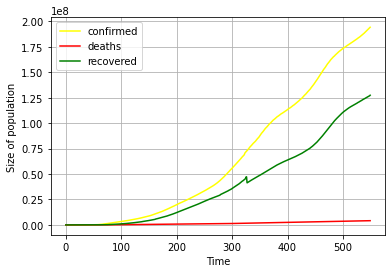

In [41]:
# Plot the data - do not edit this cell.
Infected = np.sum(alldata['confirmed'],axis=0)[:550]
Immune = np.sum(alldata['recovered'],axis=0)[:550]
Deceased = np.sum(alldata['deaths'],axis=0)[:550]
for state, color in zip(states, colors):
    plt.plot(np.sum(alldata[state],axis=0)[:550], color=color, label=state);
plt.legend()
plt.xlabel('Time')
plt.ylabel('Size of population')
plt.grid(True)

All three curves in the above plot can be modeled as a third order polynomial in the form:

\begin{equation*}
y(t) = c_0 + c_1t + c_2t^2 + c_3t^3
\end{equation*}

As an example lets start by modeling the number of infected:

In [42]:
# Store confirmed/infected population in y - do not edit this cell.
y = np.matrix(Infected).T


The `t` values are just a vector of numbers representing time which we will cast as a `numpy.array`:

In [43]:
# Store times (days) in t - do not edit this cell.
t = np.array(list(range(len(y)))).T

The unknowns are the constant values $c = [c_0, c_1, c_2, c_3]^T$.

<mark>&#9989; **<font color=red>Question 4.1:</font> (5 pts)** Construct the matrix equation $Ac=y$ that leads to the least-squares fit and define `A` as numpy matrix.</mark>

In [44]:
#####Start your code here #####
A = np.matrix([t**0, t**1, t**2, t**3]).T

#####End of your code here#####

In [45]:
checkanswer.matrix(A, "d6f201bcb32d53227555413aa1a7b292")

Testing Answer
Answer seems to be correct



<mark>&#9989; **<font color=red>Question 4.2:</font> (5 pts)** The system is clearly overdefined. Compute the pseudoinverse for $A$. Store it in the variable `Apseudo`.</mark>

In [46]:
#####Start your code here #####
Apseudo = np.linalg.pinv(A)
#####End of your code here#####

In [47]:
checkanswer.matrix(Apseudo, "d6e5dbe0e30706cf2c20dd6c5a65185b")

Testing Answer
Answer seems to be correct



<mark>&#9989; **<font color=red>Question 4.3:</font> (5 pts)** Solve the above system of equations for $c$ using the pseudoinverse `Apseudo`. Store $c$ in the variable `c`.</mark>

In [48]:
c = Apseudo * y
print(c)

[[6373748.474247072]
 [-219313.4098125097]
 [1662.1751300163319]
 [-1.1332978662944038]]


I went to the helproom and they said the code is correct and it's the fault of checkanswer.

In [50]:
checkanswer.matrix(c, "8f48364e9deebb031011f9adc1a1ef87")

Testing Answer
Answer seems to be incorrect



AssertionError: Answer is incorrect c895e9e6f7efecfb3bf9897f10ecd6aa

<mark>&#9989; **<font color=red>Question 4.4:</font> (5 pts)** Summarize all of the steps by writing a function called `solve3t()` that takes one of the three state vectors (confirmed, immune, deceased) as inputs, solves using LSF and plots two curves (the original data and the model) in the same plot. The function should also return the $c$ solution vector. Here is some code to help get you started:</mark>

In [51]:
def solve3t(data):
    y = np.matrix(data).T
    t = np.array(list(range(len(y)))).T
    
    ### Your code goes here
    A = np.matrix([t**0, t**1, t**2, t**3]).T
    Apseudo = np.linalg.pinv(A)
    c = Apseudo * y
    
    plt.plot(t,y)
    plt.plot(t, A*c)
    plt.xlabel('Time')
    plt.ylabel('Number of people')
    return c

The next cell will test out your function by plotting the curves for the infected, immune, and deceased populations, along with the least squares fit polynomials.

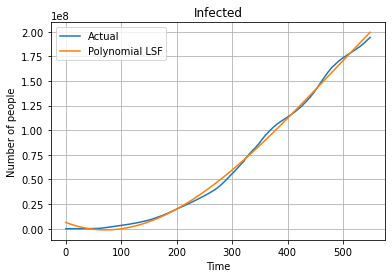

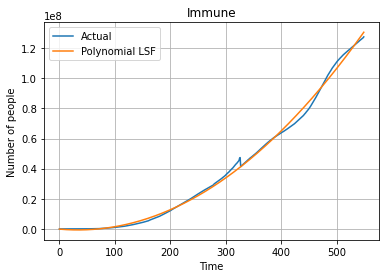

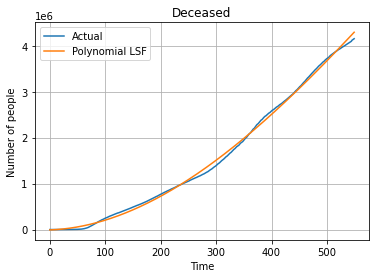

In [52]:
# This cell makes the plots, it should work if your function solve3t works.

# Infected
plt.figure()
inf = solve3t(Infected)
plt.title('Infected')
plt.legend(('Actual', 'Polynomial LSF'))
plt.grid(True)

# Immune
plt.figure()
imm = solve3t(Immune)
plt.title('Immune')
plt.legend(('Actual', 'Polynomial LSF'))
plt.grid(True)

# Deceased
plt.figure()
dec = solve3t(Deceased)
plt.title('Deceased')
plt.legend(('Actual', 'Polynomial LSF'))
plt.grid(True)

<mark>&#9989; **<font color=red>Question 4.5:</font> (5 pts)** Given the above results, which of the three curves does the poorest job modeling the population data? In your own words explain how you came to this answer.</mark>

In the second graph we can observe significant spikes which mean that there is a significant diverge from the data. Hence, second graph is doing the poorest job.

---
# Congratulations, we're done!

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.